# Projet 6
# Classifiez automatiquement des biens de consommation



## Problématique

- Etudier la faisabilité d'un moteur de classification basée sur une image et une description

## Missions

- Réaliser un prétraitement des données visuelles et textuelles;
- Classifier les différents articles

## Compétences évaluées

- Prétraiter des données image pour obtenir un jeu de données exploitable
- Prétraiter des données texte pour obtenir un jeu de données exploitable
- Représenter graphiquement des données à grandes dimensions
- Mettre en œuvre des techniques de réduction de dimension

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

pd.options.display.max_rows = 100
plt.rcParams["figure.figsize"]=20,20
sns.set_style("white")

## 1. Lecture et préparation des données

In [2]:
data0 = pd.read_csv('data/flipkart_com-ecommerce_sample_1050.csv')

In [3]:
data0.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [4]:
data0.isna().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

In [5]:
data0.shape

(1050, 15)

Pour les besoins de la classification, nous allons dans un premier temps spliter la colonne "product_category_tree". Pour cela, analysons la profondeur de l'arbre des catégories.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


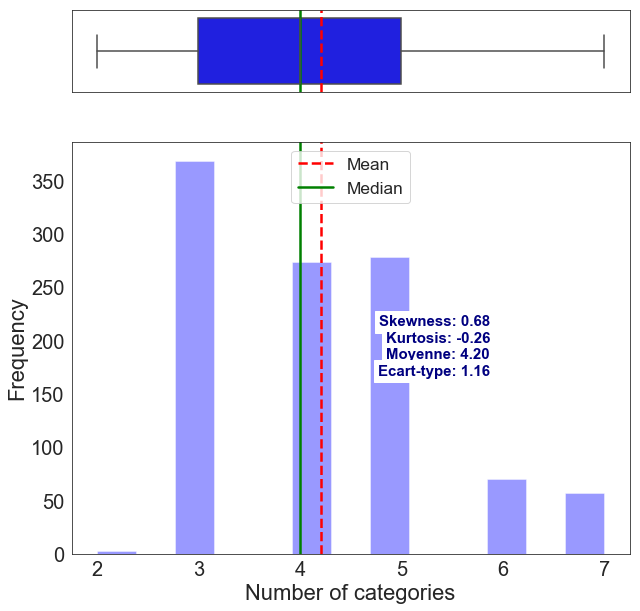

In [6]:
length_cat_split = []

for ii in data0['product_category_tree']:
    strings = ii.split('["')[1].split('"]')[0].split('>>')
    length_cat_split.append(len(strings))

length_cat_split = pd.DataFrame({'length':length_cat_split})

dataMean = length_cat_split.mean()
dataMedian = length_cat_split.median()
    
fig, (ax_box, ax_hist) = plt.subplots(2, figsize=(10,10),sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
    
sns.boxplot(length_cat_split.values,color="blue",ax=ax_box)
ax_box.axvline(float(dataMean),color='r', linestyle='--',linewidth=2.5)
ax_box.axvline(float(dataMedian), color='g', linestyle='-',linewidth=2.5)
ax_box.set_xlabel("")
ax_box.set_ylabel("")
        
xx = 0.75
location = 'upper center'
        
sns.distplot(length_cat_split.values,kde=False,color="blue",ax=ax_hist)

ax_hist.text(x=xx, y=0.58, transform=ax_hist.transAxes, s="Skewness: %.2f" % length_cat_split['length'].skew(),\
             fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
             backgroundcolor='white', color='navy')
ax_hist.text(x=xx, y=0.54, transform=ax_hist.transAxes, s="Kurtosis: %.2f" % length_cat_split['length'].kurt(),\
             fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
             backgroundcolor='white', color='navy')
ax_hist.text(x=xx, y=0.50, transform=ax_hist.transAxes, s="Moyenne: %.2f" % length_cat_split['length'].mean(),\
             fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
             backgroundcolor='white', color='navy')
ax_hist.text(x=xx, y=0.46, transform=ax_hist.transAxes, s="Ecart-type: %.2f" % length_cat_split['length'].std(),\
             fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
             backgroundcolor='white', color='navy')

yMinMax = ax_hist.get_ylim()
    
ax_hist.axvline(float(dataMean),yMinMax[0],yMinMax[1],color='r', linestyle='--',linewidth=2.5)
ax_hist.axvline(float(dataMedian),yMinMax[0],yMinMax[1], color='g', linestyle='-',linewidth=2.5)

plt.legend({'Mean':float(dataMean),'Median':float(dataMedian)},loc=location,fontsize='xx-large')
plt.xlabel('Number of categories',fontsize=22)
plt.ylabel('Frequency',fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
    
plt.show()

La plupart des arbres de catéories ont une profondeur supérieur à 2. Nous allons donc spliter cette colonne en 7 colonnes qui vont définir le niveau de catégorisation.

In [7]:
length_cat_split.max()

length    7
dtype: int64

In [8]:
def split_product_category_tree(dataframe):
    """This function split product category tree column to multiple columns"""
    
    dataframe_copy = dataframe.copy()
    
    length_cat_split = []

    for ii in dataframe_copy['product_category_tree']:
        strings = ii.split('["')[1].split('"]')[0].split('>>')
        length_cat_split.append(len(strings))
    
    nb_category = max(length_cat_split)
    
    list_category = ['category_level_'+str(i+1) for i in range(nb_category)]
    
    i = 0
    for colRow in dataframe_copy['product_category_tree']:
        strings = colRow.split('["')[1].split('"]')[0].split('>>')
    
        for j in range(nb_category):
            if j < len(strings):
                dataframe_copy.loc[i,list_category[j]] = strings[j]
        
        i +=1
    
    for col in list_category:
        dataframe_copy[col] = dataframe_copy[col].fillna('unknow_category')
        
    dataframe_copy.drop(['product_category_tree'],axis=1,inplace=True)
    return dataframe_copy
    

In [9]:
data = split_product_category_tree(data0)
data.head()

,uniq_id,crawl_timestamp,product_url,product_name,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,...,overall_rating,brand,product_specifications,category_level_1,category_level_2,category_level_3,category_level_4,category_level_5,category_level_6,category_level_7
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,...,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Curtains & Accessories,Curtains,Elegance Polyester Multicolor Abstract Eyelet...,unknow_category,unknow_category,unknow_category
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,...,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,Baby Bath & Skin,Baby Bath Towels,Sathiyas Baby Bath Towels,"Sathiyas Cotton Bath Towel (3 Bath Towel, Red...",unknow_category,unknow_category
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,...,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care,Baby Bath & Skin,Baby Bath Towels,Eurospa Baby Bath Towels,Eurospa Cotton Terry Face Towel Set (20 PIECE...,unknow_category,unknow_category
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,...,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Bed Linen,Bedsheets,SANTOSH ROYAL FASHION Bedsheets,SANTOSH ROYAL FASHION Cotton Printed King siz...,unknow_category,unknow_category
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,...,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing,Bed Linen,Bedsheets,Jaipur Print Bedsheets,Jaipur Print Cotton Floral King sized Double ...,unknow_category,unknow_category


In [10]:
data['brand'] = data['brand'].fillna('unknow_brand')
data.isna().sum()

uniq_id                    0
crawl_timestamp            0
product_url                0
product_name               0
pid                        0
retail_price               1
discounted_price           1
image                      0
is_FK_Advantage_product    0
description                0
product_rating             0
overall_rating             0
brand                      0
product_specifications     1
category_level_1           0
category_level_2           0
category_level_3           0
category_level_4           0
category_level_5           0
category_level_6           0
category_level_7           0
dtype: int64

In [11]:
data.shape

(1050, 21)

Pour la classification nous allons utiliser les variables 'image', 'description' et dans un premier temps 'category_level_1'. Ensuite, nous allons évaluer l'évolution de la précision de nos modèles en fonction du niveau de profondeur de la catégorisation.

In [12]:
data['category_level_1'].nunique()

7

In [13]:
data['category_level_1'].unique()

array(['Home Furnishing ', 'Baby Care ', 'Watches ',
       'Home Decor & Festive Needs ', 'Kitchen & Dining ',
       'Beauty and Personal Care ', 'Computers '], dtype=object)

In [14]:
data['category_level_2'].nunique()

63

In [15]:
data['category_level_2'].unique()

array([' Curtains & Accessories ', ' Baby Bath & Skin ', ' Bed Linen ',
       ' Wrist Watches ', ' Living Room Furnishing ', ' Bath Linen ',
       ' Candles & Fragrances ', ' Tableware & Cutlery ', ' Lighting ',
       ' JMD Home Furnishing ', ' Infant Wear ',
       " Kripa's Home Furnishing ", ' Hair Care ', ' Coffee Mugs ',
       ' Network Components ', ' Tablet Accessories ', ' Cookware ',
       ' Laptop Accessories ', ' Makeup ', ' Combos and Kits ',
       ' Feeding & Nursing ', ' Baby Bedding ',
       ' Kitchen & Dining Linen ', ' Containers & Bottles ',
       ' Consumables & Disposables ', ' Wall Decor & Clocks ',
       ' Table Decor & Handicrafts ', ' Flowers, Plants & Vases ',
       ' Software ', ' Showpieces ', ' Furniture & Furnishings ',
       ' Decorative Lighting & Lamps ', ' Baby Grooming ',
       ' Computer Peripherals ', ' Cushions, Pillows & Covers ',
       ' Storage ', ' Health Care ', ' Body and Skin Care ',
       ' Kitchen Tools ', ' TRUE Home Decor & 

In [16]:
data['category_level_3'].nunique()

247

In [17]:
data['category_level_3'].unique()

array([' Curtains ', ' Baby Bath Towels ', ' Bedsheets ',
       ' Maserati Time Wrist Watches', ' Camerii Wrist Watches',
       ' T STAR Wrist Watches', ' Alfajr Wrist Watches',
       ' TAG Heuer Wrist Watches', ' Calibro Wrist Watches',
       ' Cartier Wrist Watches', ' Lois Caron Wrist Watches',
       ' Titan Wrist Watches', ' Srushti Art Jewelry Wrist Watches',
       ' Escort Wrist Watches', ' Jack klein Wrist Watches',
       ' North Moon Wrist Watches', ' Franck Bella Wrist Watches',
       ' Ridas Wrist Watches', ' Skmei Wrist Watches',
       ' Now Wrist Watches', ' fastrack Wrist Watches',
       ' Disney Wrist Watches', ' Vizion Wrist Watches',
       ' Elantra Wrist Watches', ' Marvel Wrist Watches',
       ' Lenco Wrist Watches', " D'Signer Wrist Watches", ' Diwan Sets ',
       ' Duvet Covers ', ' Bath Mats', ' Home Fragrances ',
       ' Jug, Glass & Tray Sets ', ' Bulbs ',
       ' JMD Printed Cushions Cover (Pack of 2, 40 cm*40 ...',
       " Baby Girls' Clothes ",

In [18]:
data['category_level_7'].nunique()

58

In [19]:
data.set_index('uniq_id',inplace=True)

In [20]:
data.head()

,crawl_timestamp,product_url,product_name,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,category_level_1,category_level_2,category_level_3,category_level_4,category_level_5,category_level_6,category_level_7
uniq_id,,,,,,,,,,,,,,,,,,,,
55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Curtains & Accessories,Curtains,Elegance Polyester Multicolor Abstract Eyelet...,unknow_category,unknow_category,unknow_category
7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,Baby Bath & Skin,Baby Bath Towels,Sathiyas Baby Bath Towels,"Sathiyas Cotton Bath Towel (3 Bath Towel, Red...",unknow_category,unknow_category
64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care,Baby Bath & Skin,Baby Bath Towels,Eurospa Baby Bath Towels,Eurospa Cotton Terry Face Towel Set (20 PIECE...,unknow_category,unknow_category
d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Bed Linen,Bedsheets,SANTOSH ROYAL FASHION Bedsheets,SANTOSH ROYAL FASHION Cotton Printed King siz...,unknow_category,unknow_category
6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing,Bed Linen,Bedsheets,Jaipur Print Bedsheets,Jaipur Print Cotton Floral King sized Double ...,unknow_category,unknow_category


## 2. Analyse des données textuelles

### 2.1 Prétraitement des données

In [21]:
data.index[2]

'64d5d4a258243731dc7bbb1eef49ad74'

In [22]:
# Tokenisation des données

import nltk
#nltk.download()

testdata = nltk.word_tokenize(data.loc[data.index[2],'description'])
testdata

['Key',
 'Features',
 'of',
 'Eurospa',
 'Cotton',
 'Terry',
 'Face',
 'Towel',
 'Set',
 'Size',
 ':',
 'small',
 'Height',
 ':',
 '9',
 'inch',
 'GSM',
 ':',
 '360',
 ',',
 'Eurospa',
 'Cotton',
 'Terry',
 'Face',
 'Towel',
 'Set',
 '(',
 '20',
 'PIECE',
 'FACE',
 'TOWEL',
 'SET',
 ',',
 'Assorted',
 ')',
 'Price',
 ':',
 'Rs',
 '.',
 '299',
 'Eurospa',
 'brings',
 'to',
 'you',
 'an',
 'exclusively',
 'designed',
 ',',
 '100',
 '%',
 'soft',
 'cotton',
 'towels',
 'of',
 'export',
 'quality',
 '.',
 'All',
 'our',
 'products',
 'have',
 'soft',
 'texture',
 'that',
 'takes',
 'care',
 'of',
 'your',
 'skin',
 'and',
 'gives',
 'you',
 'that',
 'enriched',
 'feeling',
 'you',
 'deserve',
 '.',
 'Eurospa',
 'has',
 'been',
 'exporting',
 'its',
 'bath',
 'towels',
 'to',
 'lot',
 'of',
 'renowned',
 'brands',
 'for',
 'last',
 '10',
 'years',
 'and',
 'is',
 'famous',
 'for',
 'its',
 'fine',
 'prints',
 ',',
 'absorbency',
 ',',
 'softness',
 'and',
 'durability',
 '.',
 'NOTE',
 ':',

In [23]:
data.loc[data.index[2],'description']

'Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you an exclusively designed, 100% soft cotton towels of export quality. All our products have soft texture that takes care of your skin and gives you that enriched feeling you deserve. Eurospa has been exporting its bath towels to lot of renowned brands for last 10 years and is famous for its fine prints, absorbency, softness and durability. NOTE: Our product is 100% cotton, so it is susceptible to shrinkage. Product color may vary from the picture. Size may vary by ±3% WASH CARE: Wash in cold Water, Do not Iron, Do not Bleach, Flat dry, Wash before first use. SIZE- FACE TOWEL - 23 cms X 23 cms.,Specifications of Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Bath Towel Features Material Cotton Terry Design SHUVAM General Brand Eurospa GSM 360 Type Face Towel Set Model N

In [24]:
import re

def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

list_of_words = []
for mo, idmo in data[['description']].iterrows():
    for idx in idmo:
        tokens = nltk.word_tokenize(idx.lower())
        for tks in tokens:
            tks = tks.strip('.com').strip('-').strip('.').strip('//').strip('/').strip("'").strip(':')
            new_tokens = re.split("[:;,*\-\_/\n\.\']",tks)
            for ntks in new_tokens:
                if is_number(ntks):
                    list_of_words.append(ntks)
                elif len(ntks) <= 2:
                    list_of_words.append(ntks)

list_of_words = set(list_of_words)
list_of_words

{'',
 '!',
 '#',
 '%',
 '&',
 '(',
 ')',
 '+',
 '+60',
 '+70',
 '0',
 '00',
 '000',
 '001',
 '0021',
 '004',
 '005',
 '006',
 '0070001',
 '008',
 '0083',
 '01',
 '010',
 '011',
 '0179',
 '02',
 '03',
 '04',
 '050',
 '052',
 '06',
 '063',
 '064',
 '069',
 '07',
 '074',
 '08',
 '085',
 '09',
 '099',
 '1',
 '10',
 '100',
 '1000',
 '1001',
 '10024982',
 '101',
 '1010',
 '1015',
 '1033',
 '1038',
 '104',
 '1042',
 '1045',
 '1049',
 '107',
 '1071',
 '1075',
 '107750',
 '108',
 '1080',
 '1085',
 '10890',
 '1092',
 '1099',
 '11',
 '110',
 '1100',
 '11000026',
 '111',
 '112',
 '1132',
 '1142301',
 '1143',
 '1148',
 '1149',
 '1150',
 '1153',
 '1155',
 '1170',
 '1183',
 '119',
 '1195',
 '1199',
 '12',
 '120',
 '1200',
 '121',
 '1216',
 '122',
 '1234',
 '12399',
 '125',
 '126',
 '129',
 '1290',
 '1295',
 '1299',
 '13',
 '130',
 '132',
 '1333',
 '13400',
 '1345',
 '1349',
 '1350',
 '137',
 '138',
 '1389',
 '139',
 '1395',
 '1399',
 '14',
 '140',
 '1400',
 '14001',
 '1410',
 '144',
 '1440',
 '1449',

In [25]:
len(list_of_words)

806

In [26]:
strings = 'momo'
strings[0]

'm'

In [27]:
import re
from nltk.corpus import stopwords
from string import punctuation

def generate_stopwords(dataframe):
    
    def is_number(s):
        try:
            float(s)
            return True
        except ValueError:
            return False
    
    
    stopwords_en = list(stopwords.words('english'))
    stopwords_punct = list(punctuation) + ['``',"''",'’','--']
    
    list_of_words = ["'d", "'ll", "'re", "'s", "'ve", 'could', 'doe', 'ha', 'might', 'must','ight', 
                     'ightn', 'int', 'j', 'nce', 'nly', 'ther', 'uld', 'uldn', 'urselves', 'ust', 'ustn',
                     'ver', 'yself',"n't", 'need', 'sha', 'wa', 'wo', 'would','681g', '75x150']
    list_of_words = list_of_words + stopwords_en + stopwords_punct
    
    for text_idx, texts in dataframe.iterrows():
        for idx in texts:
            tokens = nltk.word_tokenize(idx.lower())
            for tks in tokens:
                tks = tks.strip('.com').strip('-').strip('.').strip('//').strip("'").strip(':')
                new_tokens = re.split("[:;,*\-\_/\n\.\']",tks)
                for ntks in new_tokens:
                    if len(ntks) <= 2:
                        list_of_words.append(ntks)
                    elif is_number(ntks):
                        list_of_words.append(ntks)
                    elif is_number(ntks[0]):
                        list_of_words.append(ntks)
    
    return set(list_of_words)

In [28]:
list_of_stopwords = generate_stopwords(data[['description']])
list_of_stopwords

{'',
 'ap',
 'br',
 '3g300',
 "couldn't",
 '56',
 '92',
 '8904214703639',
 'might',
 '20',
 '063',
 '1697',
 '24',
 '5692',
 '23x16x33',
 '75',
 '929',
 'ac',
 '004',
 '3500',
 '404',
 '8974pp01',
 'most',
 '24864lmgy',
 '08',
 '282',
 'can',
 '98',
 '300gs',
 '785',
 '100',
 '72',
 '461',
 '�',
 '2000',
 '19',
 'an',
 '~',
 '2004',
 'sh',
 '771',
 '769',
 'tp',
 '3125',
 'g6',
 '+60',
 '138',
 'v1',
 '218',
 '3kfactory',
 '199',
 '418',
 '275',
 '7286wna',
 'p',
 '7in',
 '1200',
 'doe',
 '880',
 '1170',
 '600',
 'gu',
 '1975',
 '795',
 '147',
 '290p',
 'gw',
 '189',
 'di',
 '980',
 '5v',
 '(',
 '552',
 '2092',
 '1001',
 'while',
 'all',
 '998',
 '1584',
 '72x78',
 '7668',
 '4999',
 '252',
 '800mhz',
 '850',
 'yk',
 '8944sl03',
 'to',
 '20564159',
 'ud',
 'o',
 '6428n',
 '7092sl01',
 'have',
 '735',
 'et',
 '150',
 '16w',
 '240kgt',
 'pv',
 '91',
 '57',
 '�t',
 '5cms',
 '241',
 '429',
 "you'll",
 '645',
 '4741g',
 '28',
 'ut',
 '725',
 '1240sg',
 'x',
 'as',
 'up',
 '56213kls230',
 'it

In [29]:
len(list_of_stopwords)

1192

In [30]:
# Exemple de nettoyage et de normalisation des données

from nltk.stem import WordNetLemmatizer

testData = data.loc[data.index[2],'description']

def cleanning_data(data_to_clean):
    
    # Tokenisation
    tokens = nltk.word_tokenize(data_to_clean.lower())
    
    # Suppression des stopwords
    text_corpus = [w for w in tokens if w not in list_of_stopwords]

    # Lemmatisation des mots
    lemmatizer = WordNetLemmatizer()
    text_corpus = [lemmatizer.lemmatize(w) for w in text_corpus]
    
    return text_corpus

newData = cleanning_data(testData)
newData

['key',
 'feature',
 'eurospa',
 'cotton',
 'terry',
 'face',
 'towel',
 'set',
 'size',
 'small',
 'height',
 'inch',
 'gsm',
 'eurospa',
 'cotton',
 'terry',
 'face',
 'towel',
 'set',
 'piece',
 'face',
 'towel',
 'set',
 'assorted',
 'price',
 'eurospa',
 'brings',
 'exclusively',
 'designed',
 'soft',
 'cotton',
 'towel',
 'export',
 'quality',
 'product',
 'soft',
 'texture',
 'take',
 'care',
 'skin',
 'give',
 'enriched',
 'feeling',
 'deserve',
 'eurospa',
 'exporting',
 'bath',
 'towel',
 'lot',
 'renowned',
 'brand',
 'last',
 'year',
 'famous',
 'fine',
 'print',
 'absorbency',
 'softness',
 'durability',
 'note',
 'product',
 'cotton',
 'susceptible',
 'shrinkage',
 'product',
 'color',
 'may',
 'vary',
 'picture',
 'size',
 'may',
 'vary',
 'wash',
 'care',
 'wash',
 'cold',
 'water',
 'iron',
 'bleach',
 'flat',
 'dry',
 'wash',
 'first',
 'use',
 'size-',
 'face',
 'towel',
 'cm',
 'cms.',
 'specification',
 'eurospa',
 'cotton',
 'terry',
 'face',
 'towel',
 'set',
 'p

In [31]:
freq = nltk.FreqDist(newData)
freq.most_common(20)

[('towel', 11),
 ('face', 8),
 ('set', 7),
 ('eurospa', 6),
 ('cotton', 6),
 ('terry', 4),
 ('size', 3),
 ('inch', 3),
 ('piece', 3),
 ('assorted', 3),
 ('product', 3),
 ('wash', 3),
 ('feature', 2),
 ('small', 2),
 ('gsm', 2),
 ('soft', 2),
 ('care', 2),
 ('bath', 2),
 ('brand', 2),
 ('color', 2)]

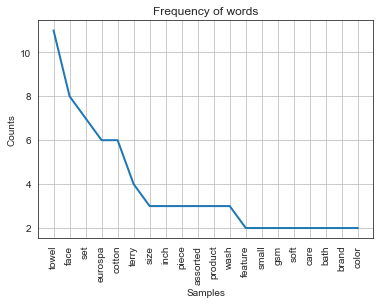

In [32]:
freq.plot(20,title="Frequency of words")

In [33]:
len('momo')

4

In [34]:
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import WordNetLemmatizer

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    new_tokens = []
    for tks in tokens:
        tks = tks.strip('.com').strip('-').strip('.').strip('//').strip('/').strip("'").strip(':')
        for ntks in re.split("[:;,*\-\_/\n\.\']",tks):
            new_tokens.append(ntks)
                
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(w) for w in new_tokens]
    
    return tokens


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(lowercase=True,tokenizer=tokenize,stop_words=list_of_stopwords)

tf_vectors = tfidf.fit_transform(data['description'])

In [36]:
tf_vectors

<1050x4570 sparse matrix of type '<class 'numpy.float64'>'
	with 31973 stored elements in Compressed Sparse Row format>

In [37]:
tfidf.vocabulary_

{'key': 2128,
 'feature': 1325,
 'elegance': 1096,
 'polyester': 2844,
 'ulticolor': 4150,
 'abstract': 20,
 'eyelet': 1275,
 'door': 962,
 'urtain': 4224,
 'floral': 1420,
 'height': 1754,
 'pack': 2604,
 'price': 2923,
 'enhances': 1137,
 'look': 2333,
 'interior': 1997,
 'ade': 64,
 'high': 1779,
 'quality': 3019,
 'fabric': 1280,
 'style': 3821,
 'stitch': 3770,
 'etal': 1199,
 'ring': 3272,
 'akes': 123,
 'environment': 1167,
 'romanti': 3307,
 'loving': 2374,
 'ant': 233,
 'wrinkle': 4514,
 'anti': 237,
 'shrinkage': 3548,
 'elegant': 1097,
 'apparance': 265,
 'give': 1582,
 'home': 1817,
 'bright': 698,
 'dernisti': 863,
 'appeal': 267,
 'design': 867,
 'surreal': 3883,
 'attention': 411,
 'sure': 3874,
 'steal': 3756,
 'heart': 1741,
 'ntemporary': 2568,
 'valance': 4284,
 'urtains': 4225,
 'slide': 3609,
 'smoothly': 3635,
 'draw': 973,
 'apart': 259,
 'first': 1387,
 'thing': 3994,
 'rning': 3292,
 'welcome': 4432,
 'sun': 3847,
 'ray': 3087,
 'want': 4395,
 'wish': 4474,
 'g

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

tfidf1 = CountVectorizer(lowercase=True,tokenizer=tokenize,stop_words=list_of_stopwords)

tf = tfidf1.fit_transform(data['description'])

In [39]:
tf

<1050x4570 sparse matrix of type '<class 'numpy.int64'>'
	with 31973 stored elements in Compressed Sparse Row format>

In [40]:
print(tf)

  (0, 399)	1
  (0, 638)	1
  (0, 2605)	2
  (0, 3387)	2
  (0, 2571)	1
  (0, 2578)	1
  (0, 672)	1
  (0, 2259)	1
  (0, 909)	1
  (0, 2340)	1
  (0, 1011)	1
  (0, 3483)	1
  (0, 2433)	1
  (0, 835)	2
  (0, 4131)	1
  (0, 868)	1
  (0, 682)	1
  (0, 1555)	1
  (0, 3705)	1
  (0, 3852)	1
  (0, 193)	1
  (0, 3265)	1
  (0, 1565)	1
  (0, 2277)	1
  (0, 1371)	1
  :	:
  (1048, 1660)	1
  (1048, 3200)	1
  (1048, 805)	1
  (1048, 1560)	1
  (1048, 2525)	1
  (1048, 751)	1
  (1048, 2949)	1
  (1048, 2923)	1
  (1049, 4135)	2
  (1049, 4349)	2
  (1049, 3767)	2
  (1049, 2202)	2
  (1049, 575)	1
  (1049, 843)	1
  (1049, 359)	1
  (1049, 3522)	1
  (1049, 1475)	1
  (1049, 1660)	1
  (1049, 3200)	1
  (1049, 805)	1
  (1049, 1560)	1
  (1049, 2525)	1
  (1049, 751)	1
  (1049, 2949)	1
  (1049, 2923)	1


### 2.2 Classification supervisée des données textuelles

In [41]:
import sklearn.metrics as metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [42]:
X = data['description']
Y = data['category_level_1']
Y

uniq_id
55b85ea15a1536d46b7190ad6fff8ce7               Home Furnishing 
7b72c92c2f6c40268628ec5f14c6d590                     Baby Care 
64d5d4a258243731dc7bbb1eef49ad74                     Baby Care 
d4684dcdc759dd9cdf41504698d737d8               Home Furnishing 
6325b6870c54cd47be6ebfbffa620ec7               Home Furnishing 
893aa5ed55f7cff2eccea7758d7a86bd                       Watches 
f355cc1ccb08bd0d283ed979b7ee7515                       Watches 
dd0e3470a7e6ed76fd69c2da27721041                       Watches 
41384da51732c0b4df3de8f395714fbb                       Watches 
710ed5f2393a4b9e8823aa0029f71f93                       Watches 
920154acbe49d3202ed7d2ed2df1ea13                       Watches 
08452abdadb3db1e686b94a9c52fc7b6                       Watches 
1e8741b5ae27a513546c94b3f3312aee                       Watches 
189fa66a5fa6f08d2802a62ecf0be298                       Watches 
bbb8cdc5406ff60ff06ff64630f2ca47                       Watches 
1120bc768623572513df956172ffefeb

#### Transformation des variables

In [43]:
# Encodage de la variable à prédire

encoder = LabelEncoder()
y_encode = encoder.fit_transform(Y)
y_encode

array([4, 0, 0, ..., 0, 0, 0])

In [44]:
classes = encoder.classes_
classes

array(['Baby Care ', 'Beauty and Personal Care ', 'Computers ',
       'Home Decor & Festive Needs ', 'Home Furnishing ',
       'Kitchen & Dining ', 'Watches '], dtype=object)

In [45]:
# Séparation des données en partie de training et de test

X_train, X_test, y_train, y_test = train_test_split(X,y_encode,test_size=0.2,random_state=42)

In [46]:
X_train.shape

(840,)

In [47]:
X_test.shape

(210,)

In [48]:
# Transformation de la matrice creuse d'occurence des mots

tfidf = TfidfVectorizer(lowercase=True,tokenizer=tokenize,stop_words=list_of_stopwords)

train_vectors = tfidf.fit_transform(X_train)
test_vectors = tfidf.transform(X_test)

In [49]:
train_vectors

<840x3956 sparse matrix of type '<class 'numpy.float64'>'
	with 25374 stored elements in Compressed Sparse Row format>

In [50]:
test_vectors

<210x3956 sparse matrix of type '<class 'numpy.float64'>'
	with 5953 stored elements in Compressed Sparse Row format>

#### Entraînement d'un classifieur bayésien

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

In [52]:
parameters = {"alpha": np.arange(0.0, 1.1, 0.1), "fit_prior": [True,False]}

mnb_grid = GridSearchCV(estimator = MultinomialNB(), 
                        param_grid = parameters,
                        scoring="accuracy",cv=5,
                        verbose=0
                       )

mnb_grid.fit(train_vectors, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\ProgramData\Anaconda3\lib\s

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), 'fit_prior': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [53]:
mnb_grid.best_params_

{'alpha': 0.1, 'fit_prior': True}

In [54]:
mnb_grid.best_score_

0.9071428571428571

In [55]:
models_score = pd.DataFrame({})
models_score = models_score.append(pd.DataFrame(
    {'Models' : ['MultinomialNB'],
     'train_accuracy' : [metrics.accuracy_score(y_train,mnb_grid.predict(train_vectors))],
     'test_accuracy' : [metrics.accuracy_score(y_test,mnb_grid.predict(test_vectors))]}),
                                   ignore_index=True)

models_score.head()

,Models,train_accuracy,test_accuracy
0,MultinomialNB,0.989286,0.947619


In [56]:
mnb = MultinomialNB(alpha = 0.1, fit_prior = True)
mnb.fit(train_vectors, y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [57]:
mnb.feature_log_prob_.shape

(7, 3956)

In [58]:
mnb.feature_log_prob_[:,0]

array([-9.15113394, -9.10715607, -8.59558256, -9.09104192, -9.03806429,
       -9.15476732, -9.0436969 ])

In [59]:
mnb.classes_

array([0, 1, 2, 3, 4, 5, 6])

In [60]:
y_predict = mnb.predict(test_vectors)
y_predict

array([2, 5, 2, 1, 6, 0, 3, 2, 4, 4, 6, 4, 5, 1, 2, 2, 0, 2, 4, 4, 5, 2,
       0, 2, 6, 1, 3, 5, 1, 5, 5, 2, 2, 6, 3, 4, 6, 3, 3, 2, 4, 1, 5, 4,
       1, 5, 5, 2, 0, 4, 5, 3, 5, 4, 2, 0, 1, 5, 2, 4, 4, 0, 6, 5, 6, 4,
       3, 3, 4, 6, 0, 2, 2, 2, 6, 1, 4, 3, 2, 4, 3, 4, 2, 5, 1, 6, 4, 3,
       3, 3, 4, 4, 5, 3, 6, 2, 0, 6, 3, 0, 4, 6, 3, 4, 2, 6, 1, 5, 4, 2,
       5, 4, 4, 0, 4, 0, 2, 6, 6, 2, 2, 2, 3, 4, 5, 2, 1, 3, 0, 4, 5, 1,
       3, 3, 1, 5, 3, 1, 5, 2, 5, 0, 3, 4, 4, 6, 6, 1, 3, 1, 6, 1, 6, 3,
       2, 4, 6, 1, 3, 6, 6, 6, 0, 2, 3, 6, 6, 2, 6, 2, 6, 1, 4, 6, 0, 6,
       3, 3, 4, 3, 0, 5, 4, 3, 0, 1, 1, 6, 2, 4, 1, 6, 5, 4, 5, 2, 1, 5,
       2, 2, 1, 0, 4, 2, 1, 3, 6, 0, 0, 3])

In [61]:
labels = mnb.predict(test_vectors)

In [62]:
len(np.unique(labels))

7

In [63]:
proba = mnb.predict_proba(test_vectors)
proba.shape

(210, 7)

In [64]:
from sklearn.manifold import TSNE

In [65]:
X_embedded = TSNE(n_components=2).fit_transform(proba)
X_embedded.shape

(210, 2)

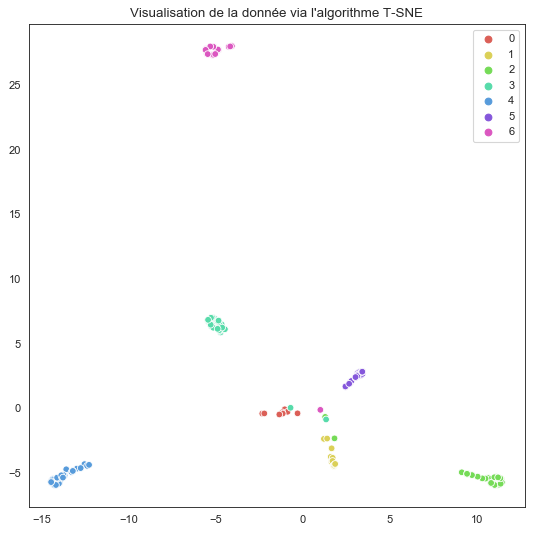

In [66]:
fig,ax = plt.subplots(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')

plt.title("Visualisation de la donnée via l'algorithme T-SNE")
g = sns.scatterplot(X_embedded[:,0], X_embedded[:,1],
                    hue=labels,
                    palette=sns.color_palette("hls",n_colors=len(np.unique(labels))))

plt.show()

In [67]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap="viridis"):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'# Compute confusion matrix
    cm = metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    fig, ax = plt.subplots(figsize=(8,8))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax,fraction=0.045,pad=0.05)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')# Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")# Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="black" if cm[i, j] > thresh else "white",fontsize=14)
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[20  2  0  2  3  0  0]
 [ 0 21  0  0  0  0  0]
 [ 0  2 36  0  0  0  0]
 [ 0  0  1 29  0  0  0]
 [ 0  0  0  1 34  0  0]
 [ 0  0  0  0  0 26  0]
 [ 0  0  0  0  0  0 33]]


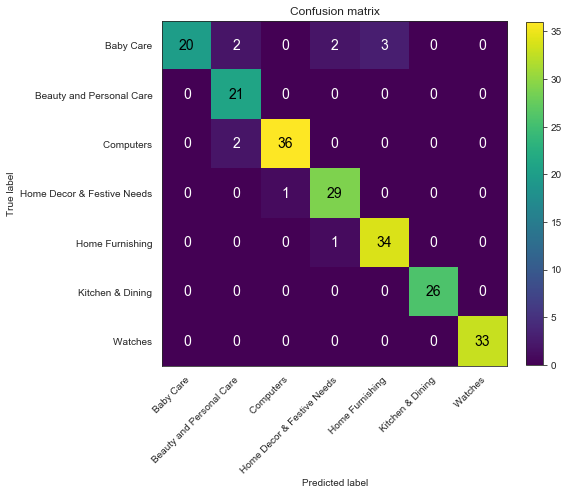

In [68]:
plot_confusion_matrix(y_test, y_predict, classes= classes,title='Confusion matrix')

#### Entraînement d'un modèle de régression logistique

In [69]:
from sklearn.linear_model import LogisticRegression

In [72]:
parameters = {"penalty": ['l1','l2'], "C": [0.001,0.01,0.1,1.,10.,100.,1000.,10000.,1000000.]}

lr_grid = GridSearchCV(estimator = LogisticRegression(random_state=42),
                       param_grid = parameters,
                       scoring="accuracy",cv=5,
                       verbose=0
                       )

lr_grid.fit(train_vectors, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 1000000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [73]:
lr_grid.best_params_

{'C': 100.0, 'penalty': 'l2'}

In [74]:
lr_grid.best_score_

0.930952380952381

In [75]:
models_score = models_score.append(pd.DataFrame(
    {'Models' : ['Logistic Regression'],
     'train_accuracy' : [metrics.accuracy_score(y_train,lr_grid.predict(train_vectors))],
     'test_accuracy' : [metrics.accuracy_score(y_test,lr_grid.predict(test_vectors))]}),
                                   ignore_index=True)

models_score.head()

,Models,train_accuracy,test_accuracy
0,MultinomialNB,0.989286,0.947619
1,Logistic Regression,1.000000,0.961905


In [76]:
lr = LogisticRegression(C=1000000.0,penalty='l2',random_state=42)
lr.fit(train_vectors, y_train)

LogisticRegression(C=1000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=42,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [77]:
labels = lr.predict(test_vectors)
proba = lr.predict_proba(test_vectors)

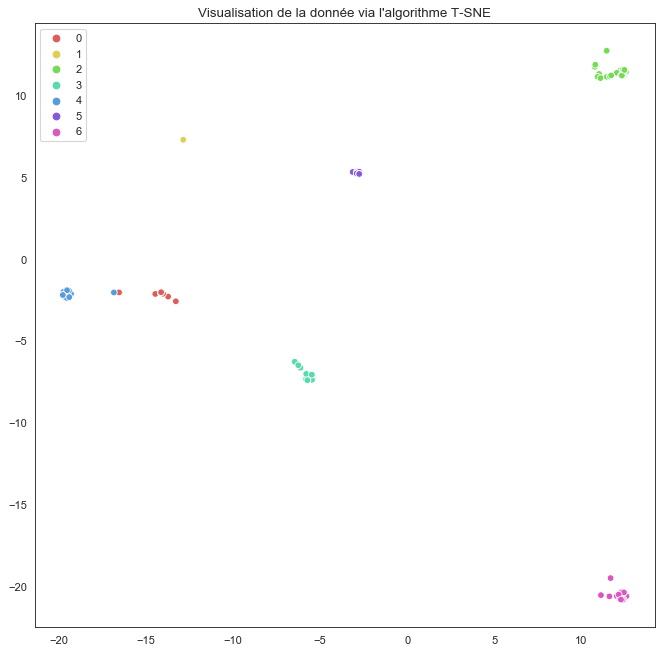

In [79]:
X_embedded = TSNE(n_components=2).fit_transform(proba)

fig,ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.title("Visualisation de la donnée via l'algorithme T-SNE")
g = sns.scatterplot(X_embedded[:,0], X_embedded[:,1],
                    hue=labels,
                    palette=sns.color_palette("hls",n_colors=len(np.unique(labels))))

plt.show()

#### Entrainement d'une machine à vecteurs de support

In [80]:
from sklearn.svm import SVC

In [81]:
parameters = {'C' : [0.001,0.01,0.1,1.,10.,100.,1000.,10000.,1000000.],
              'gamma' : ['scale','auto']}

svc_grid = GridSearchCV(estimator = SVC(random_state=42),
                        param_grid = parameters,
                        scoring="accuracy",cv=5,
                        verbose=0
                       )

svc_grid.fit(train_vectors, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 1000000.0], 'gamma': ['scale', 'auto']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [82]:
svc_grid.best_params_

{'C': 100.0, 'gamma': 'scale'}

In [83]:
svc_grid.best_score_

0.9238095238095239

In [84]:
models_score = models_score.append(pd.DataFrame(
    {'Models' : ['Support Vector Classifier'],
     'train_accuracy' : [metrics.accuracy_score(y_train,svc_grid.predict(train_vectors))],
     'test_accuracy' : [metrics.accuracy_score(y_test,svc_grid.predict(test_vectors))]}),
                                   ignore_index=True)

models_score.head()

,Models,train_accuracy,test_accuracy
0,MultinomialNB,0.989286,0.947619
1,Logistic Regression,1.000000,0.961905
2,Support Vector Classifier,0.998810,0.957143


#### Entraînement d'un modèle Random Forest

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
parameters = {'n_estimators' : [100], 'min_samples_leaf' : [1,2,3,4,5,6,7,8,9,10], 
              'max_features': [int(x) for x in np.linspace(1,20,20)]}

rfc_grid = GridSearchCV(estimator = RandomForestClassifier(random_state=42),
                        param_grid = parameters,
                        scoring="accuracy",cv=5,
                        verbose=0
                       )

rfc_grid.fit(train_vectors, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [87]:
rfc_grid.best_params_

{'max_features': 15, 'min_samples_leaf': 1, 'n_estimators': 100}

In [88]:
rfc_grid.best_score_

0.905952380952381

In [89]:
models_score = models_score.append(pd.DataFrame(
    {'Models' : ['Random Forest Classifier'],
     'train_accuracy' : [metrics.accuracy_score(y_train,rfc_grid.predict(train_vectors))],
     'test_accuracy' : [metrics.accuracy_score(y_test,rfc_grid.predict(test_vectors))]}),
                                   ignore_index=True)

models_score.head()

,Models,train_accuracy,test_accuracy
0,MultinomialNB,0.989286,0.947619
1,Logistic Regression,1.000000,0.961905
2,Support Vector Classifier,0.998810,0.957143
3,Random Forest Classifier,1.000000,0.933333


In [90]:
rfc = RandomForestClassifier(max_features=16,min_samples_leaf=1,n_estimators=100,random_state=42)
rfc.fit(train_vectors, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=16, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [91]:
labels = rfc.predict(test_vectors)
proba = rfc.predict_proba(test_vectors)

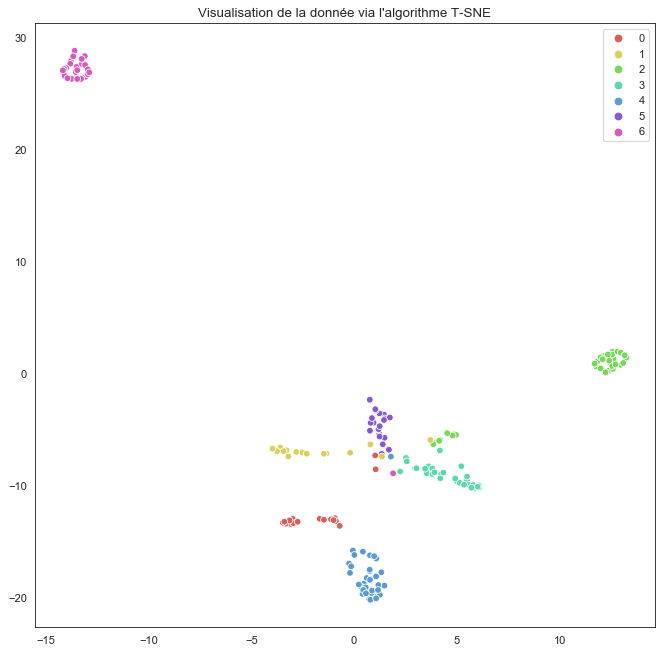

In [93]:
X_embedded = TSNE(n_components=2).fit_transform(proba)

fig,ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.title("Visualisation de la donnée via l'algorithme T-SNE")
g = sns.scatterplot(X_embedded[:,0], X_embedded[:,1],
                    hue=labels,
                    palette=sns.color_palette("hls",n_colors=len(np.unique(labels))))

plt.show()

On voit que l'ensemble des algorithmes entrainés produisent de bons résultats avec des taux de précision supérieurs à 90% sur le jeu de données test. Le modèle de regression logistique est celui pour lequel le taux de précision est le plus élevé (plus de 96%).

#### Réduction de dimension avec LDA et classification

In [94]:
from sklearn.decomposition import LatentDirichletAllocation, NMF

In [95]:
n_topics = data['category_level_1'].nunique()

lda = LatentDirichletAllocation(n_components = n_topics,random_state=42)
lda.fit(train_vectors)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=7, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=42, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [96]:
tfidf_features_names = tfidf.get_feature_names()
tfidf_features_names

['a200',
 'a897lla',
 'aaa',
 'aapn',
 'aari',
 'aarika',
 'ability',
 'abkl',
 'able',
 'abode',
 'abrasion',
 'abroad',
 'absorbency',
 'absorbent',
 'absorber',
 'absorbing',
 'absorbs',
 'abstract',
 'abstrcts',
 'ac116tx',
 'ac121tu',
 'ac1900',
 'ac2400',
 'ac68u',
 'ac750',
 'acbook',
 'accent',
 'access',
 'accessory',
 'accident',
 'accidental',
 'accommodate',
 'accomplishes',
 'according',
 'acer',
 'ache',
 'achine',
 'achines',
 'achinewash',
 'aci20160340',
 'acne',
 'across',
 'acryli',
 'act',
 'active',
 'actual',
 'actus',
 'ad1057',
 'adaa',
 'adapter',
 'adaptor',
 'add',
 'added',
 'addiction',
 'adding',
 'addition',
 'additional',
 'additionally',
 'ade',
 'adf04',
 'adhesive',
 'adi',
 'adidas',
 'adin',
 'adjust',
 'adjustable',
 'adjusted',
 'adjusts',
 'admiration',
 'admired',
 'adorable',
 'adorn',
 'adorning',
 'adsl',
 'advance',
 'advice',
 'advisable',
 'aer',
 'afatlal',
 'affect',
 'affordable',
 'afternoon',
 'agan',
 'age',
 'ageless',
 'agi',
 'agi

In [97]:
def get_models_topics(model, feature_names, no_top_words):
    word_dict = {};
    for topic_idx, topic in enumerate(model.components_):
        words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        word_dict['Topic {}'.format(topic_idx+1)] = [i for i in words];
    return pd.DataFrame(word_dict);

In [98]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

get_models_topics(lda,tfidf_features_names, 10)

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7
0,analog,flipkart,usb,rockmantra,baby,pizza,xofere
1,watch,guarantee,laptop,ugs,tton,utter,soap
2,woman,ash,battery,erami,girl,wild,rose
3,dial,shipping,ffee,gift,pack,legging,aloevera
4,strap,genuine,warranty,perfect,detail,duvet,kit
5,axima,delivery,ell,give,single,wheel,kalash
6,resistant,replacement,light,reation,fabri,stone,battery
7,discount,buy,adapter,exclusive,abstract,skin,papaya
8,great,free,power,yet,towel,sapatos,welhouse
9,india,day,tea,year,ulticolor,dark,jasmine


On voit que les topics obtenus ne sont pas tous homogènes.

In [99]:
X_train_lda = lda.transform(train_vectors)
X_test_lda = lda.transform(test_vectors)

In [100]:
parameters = {"penalty": ['l1','l2'], "C": [0.001,0.01,0.1,1.,10.,100.,1000.,10000.,1000000.]}

lr_grid2 = GridSearchCV(estimator = LogisticRegression(random_state=42),
                       param_grid = parameters,
                       scoring="accuracy",cv=5,
                       verbose=0
                       )

lr_grid2.fit(X_train_lda, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default so

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default mu

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sk

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 1000000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [101]:
lr_grid2.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [102]:
models_score2 = pd.DataFrame({})
models_score2 = models_score2.append(pd.DataFrame(
    {'Models' : ['Support Vector Classifier'],
     'train_accuracy' : [metrics.accuracy_score(y_train,lr_grid2.predict(X_train_lda))],
     'test_accuracy' : [metrics.accuracy_score(y_test,lr_grid2.predict(X_test_lda))]}),
                                   ignore_index=True)

models_score2.head()

,Models,train_accuracy,test_accuracy
0,Support Vector Classifier,0.369048,0.385714


### Evaluation de la précision en fonction de la profondeur de la catégorisation

In [103]:
models_score = pd.DataFrame({})

parameters = {"alpha": np.arange(0.0, 10.0, 0.1), "fit_prior": [True,False]}

mdl_grid = GridSearchCV(estimator = MultinomialNB(), 
                        param_grid = parameters,
                        scoring="accuracy",cv=5,
                        verbose=0
                       )
    
for i in range(1,7):
    col = 'category_level_'+str(i)
    print(col)
    
    X = data['description']
    Y = data[col]
    
    encoder = LabelEncoder()
    y_encode = encoder.fit_transform(Y)
    classes = encoder.classes_
    
    X_train, X_test, y_train, y_test = train_test_split(X,y_encode,test_size=0.2,random_state=42)

    print(X_train.shape)
    print(y_train.shape)
    tfidf = TfidfVectorizer(lowercase=True,tokenizer=tokenize,stop_words=list_of_stopwords)

    train_vectors = tfidf.fit_transform(X_train)
    test_vectors = tfidf.transform(X_test)

    print(y_train)
    mdl_grid.fit(train_vectors, y_train)

    models_score = models_score.append(pd.DataFrame(
    {'Category' : [col],
     'train_accuracy' : [metrics.accuracy_score(y_train,mdl_grid.predict(train_vectors))],
     'test_accuracy' : [metrics.accuracy_score(y_test,mdl_grid.predict(test_vectors))]}),
                                   ignore_index=True)


category_level_1
(840,)
(840,)
[6 3 2 2 4 1 0 4 3 3 4 0 1 4 2 3 4 0 2 1 2 2 1 2 5 4 0 6 1 4 4 4 4 0 3 2 3
 3 0 5 0 6 5 0 5 0 5 3 1 0 0 6 6 5 3 2 1 2 1 2 6 5 0 4 3 4 0 3 5 2 6 0 6 0
 5 6 1 4 3 4 0 5 5 1 0 1 1 3 5 0 6 4 6 6 6 1 1 6 2 4 3 2 6 1 4 4 5 6 4 1 2
 5 3 3 0 3 1 4 4 6 2 3 6 3 2 6 5 3 1 3 0 6 6 3 3 1 0 5 1 0 5 6 3 4 1 6 5 1
 6 5 2 0 3 4 4 0 4 1 1 6 6 5 6 4 5 3 6 6 3 6 0 5 3 0 6 6 2 1 2 5 3 1 2 0 6
 2 4 4 6 1 1 6 4 1 4 0 4 5 1 3 6 3 0 3 0 5 1 5 4 4 5 0 5 5 0 2 5 5 4 4 5 0
 4 5 6 3 3 5 4 2 3 5 6 5 5 6 1 6 4 2 0 1 6 5 5 2 5 0 3 4 5 0 3 4 1 5 4 1 4
 0 1 2 4 0 0 4 2 6 6 6 0 0 2 3 1 2 2 2 3 1 0 3 4 5 1 4 1 6 5 6 0 6 0 0 2 0
 1 6 3 6 1 2 3 6 1 0 0 2 0 2 4 1 1 4 1 1 0 3 6 2 0 1 3 0 4 4 4 6 1 6 0 5 1
 0 0 6 3 1 0 3 3 2 6 0 2 4 3 5 1 6 6 1 4 4 6 1 2 3 1 3 6 3 6 5 4 3 0 2 5 0
 6 6 2 5 3 3 2 6 0 4 2 0 2 1 3 1 2 1 4 0 2 5 5 2 3 3 3 5 4 3 4 1 3 2 3 1 5
 1 2 4 5 2 5 5 1 2 3 1 6 0 2 4 2 6 3 5 5 5 4 4 3 1 5 5 4 3 6 6 1 6 1 1 5 6
 4 5 2 0 1 5 1 2 1 6 5 4 6 1 5 0 5 1 5 6 2 5 5 3 6 3 2 2 6 0 3 3 6 2 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\ProgramData\Anaconda3\lib\s

category_level_2
(840,)
(840,)
[62 56 39 39 19 13 34  8 51 27  5 34  7 36 47 51 36 34 47 28 47 47 28 47
 12  8 34 62 28  8  5  8 36 34 51 39 51 50  2 37 34 62 41 34 37 25 12 51
 13 34 34 62 62 12 51 47  9 39 28 40 62 12 34  5 51  8  2 51 37 39 62  2
 62 34 18 62 28 36 51 44 34 18 37 13 34 28 45 27 12  2 62 36 62 62 62  6
 28 62 39  8 56 39 62 31  8 43 18 62  8 28 39  4 60 51 34 55 28  8  8 62
 39 51 62 56 39 62 41 51 28 51  2 62 62 51 56 28 29 12 45 34  4 62 60 36
  9 62 12 28 62 37 47 34 50  5 20  0 20 45 13 62 62 18 62 26 12 51 62 62
 51 62 34 12 51  1 62 62 39 31 39 12 27 28 39  0 62 39  8 19 62 28 28 62
 20 28  8  0  8 12  9 60 62 27  2 51 34 12 28 18  8 26 17 34 12 18 22 47
 12 17 26  8 12  1  8 12 62 56 51 58  8 39 56 12 62 12 12 62 13 62 26 39
 34  6 62 18 12 39 18 34 51  8 12  0 60  8 61 12 38 13  8 34 45 39  8 22
  1  8 39 62 62 62  0 34 39 56 28 57 47 39 56  9  1 51  8 17  6  8 28 62
 12 62 34 62 25 34 47 34 13 62 51 62 28 47 49 62 28 25 34 39 25 39  8 28
  9 36 28 28 34 56 6

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting a

category_level_3
(840,)
(840,)
[221 212  26   4  64 140  13  32  80  89  24  14 138 119 189 242 215  14
 189  71 189 189  71 189 174  32  14 144  71  32 224  32 119  14  84 225
   2  59  10 118  14 244  40  13 118 229 175  79 148  14  14 220  77 187
 139 189  82 225  71  97  90 196  14 224 217  32  11 190 118   4 203  20
 221  13 171 221  71 211  27  74  14 171 118 160  13  71 131  89   1  18
 191 214 203  83 144  34  71 142  26  32 198 225 164  98  32 202 171 221
  28  71  26  21  53  80  14 246  71  32  32 209 225  79 188 198 126 203
  40  79  71  79  11 121 144  79 198  71 109 174  81  14  22  96 161 119
  82 208 174  71  83 118 189  14  30 224  66 206  65  81 160 203 220 171
 164  45 174  79 144 164 159  41  13 187  79  19 203 221 225  57  26 187
   8  71  26 166 203 225  32  64 164  71  71 164  67  71  32  70  32 187
 101 161 144   8  10  80  13 174  71 171  32  45 135  14 175 129 151 189
 187  58  45  32 175  12  32 187 233 198 184 115  32   4 198 175 165 187
 187  44 148 144  45

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting a

category_level_4
(840,)
(840,)
[350 141 175 280 323 194  52 350 350   4  21  14  61  79 297 350 322  96
 304  73 154  34 285 342 350 350 107 350  73 350 350 350 309  96 248  20
 350 266 284 230  96 346 319 332 132  39 350 224 350  96  96 350 350 350
 350 179 289 105  73 350 350 272 150 350 350 350 217 350 230 280 350  38
 350 268 333 350  73 234 350 258  96 333 230 350  52  73 182   4  10  65
 350 161 350 350 350 262  73 350 175 350 250  49 350 129 350  47 333 350
 350  73 127  76 324 350  96 350  73 350 350 350  86 302 350 114 130 350
 221 256  73 173 155 350 350 244 250  73 153 350 109  96 344 350 327  80
 289 350 350  73 350 230  34  96  46 350  19 328 350 109 350 350 350  75
 350 189 350 173 350 350 350 350  14 350 213   0 350 350 164  62 175 350
 202  73 247 334 350 237 350 102 350  73  73 350 118  73 350  94 350 350
 193 299 350 317 284 350 231 350  73 333 350 111 119  96 350 103 207 297
 350 168 343 350 350 171 350 350 350 250 350 162 350 280 144 350 350 350
 350 350 350 350 112

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting a

category_level_5
(840,)
(840,)
[297  75 297 244 297 297  40 297 297   2 297  51 155 297 297 297 297  70
 297 273 297 297 154 297 297 297 230 297 179 297 297 297 260  70 216 297
 297 235 246 150  70 297 297 133 137  95 297 297 297  70  70 297 297 297
 297 297 218 297  78 297 297 297 178 297 297 297 297 297  52 244 297  29
 297  45 251 297   7 297 297 222  70 180 261 297  40  34 103   3 297  47
 297 297 297 297 297 297 201 297 297 297  67 297 297 164 297 297 204 297
 297 201 297 236 286 297  70 297  65 297 297 297 297 297 297 266 113 297
 297 297   8 297 297 297 297 297   9 206 297 297 285  70 291 297 297 297
 275 297 297 280 297  10 297  70 297 297 297 297 297 168 297 297 297 277
 297 297 297 297 297 297 297 297  51 297 297   0 297 297 297  43 297 297
 169 276 297 297 297 297 297 297 297 273 276 297  96 276 297  69 297 297
 229 297 297 269 247 297  68 297   8 253 297 297  97  70 297 297 297 297
 297 160 297 297 297 153 297 297 297  23 297 207 297 244 115 297 297 297
 297 297 297 297 297

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting a

category_level_6
(840,)
(840,)
[117  29 117 117 117 117 104 117 117 117 117  79  58 117 117 117 117  38
 117 117 117 117  56 117 117 117  92 117 117 117 117 117 117  95 117 117
 117 117 117 117 102 117 117  99  49 117 117 117 117  67  72 117 117 117
 117 117 117 117 117 117 117 117  19 117 117 117 117 117 117 117 117 117
 117  18 117 117 117 117 117 117  62 117 117 117 109 117  43 117 117 117
 117 117 117 117 117 117 117 117 117 117 117 117 117  63 117 117 117 117
 117 117 117 117 117 117 102 117 117 117 117 117 117 117 117  98 117 117
 117 117 117 117 117 117 117 117 117 117 117 117 111  23 117 117 117 117
 117 117 117 117 117 117 117  47 117 117 117 117 117  64 117 117 117 101
 117 117 117 117 117 117 117 117 112 117 117 117 117 117 117 117 117 117
 117 117 117 117 117 117 117 117 117 117 117 117 117 117 117 117 117 117
 117 117 117 117 117 117  27 117 117 117 117 117 117  62 117 117 117 117
 117  60 117 117 117 117 117 117 117 117 117  81 117 117 117 117 117 117
 117 117 117 117 117

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting a

In [104]:
models_score

,Category,train_accuracy,test_accuracy
0,category_level_1,0.989286,0.947619
1,category_level_2,0.984524,0.833333
2,category_level_3,0.998810,0.676190
3,category_level_4,0.997619,0.552381
4,category_level_5,1.000000,0.723810
5,category_level_6,1.000000,0.919048


### 2.3 Classification non supervisée des données textuelles

In [105]:
data.head()

,crawl_timestamp,product_url,product_name,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,category_level_1,category_level_2,category_level_3,category_level_4,category_level_5,category_level_6,category_level_7
uniq_id,,,,,,,,,,,,,,,,,,,,
55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Curtains & Accessories,Curtains,Elegance Polyester Multicolor Abstract Eyelet...,unknow_category,unknow_category,unknow_category
7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,Baby Bath & Skin,Baby Bath Towels,Sathiyas Baby Bath Towels,"Sathiyas Cotton Bath Towel (3 Bath Towel, Red...",unknow_category,unknow_category
64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care,Baby Bath & Skin,Baby Bath Towels,Eurospa Baby Bath Towels,Eurospa Cotton Terry Face Towel Set (20 PIECE...,unknow_category,unknow_category
d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Bed Linen,Bedsheets,SANTOSH ROYAL FASHION Bedsheets,SANTOSH ROYAL FASHION Cotton Printed King siz...,unknow_category,unknow_category
6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing,Bed Linen,Bedsheets,Jaipur Print Bedsheets,Jaipur Print Cotton Floral King sized Double ...,unknow_category,unknow_category


#### 2.3.1 Préparation des données

In [106]:
newData = data['description']

tf = TfidfVectorizer(lowercase=True,tokenizer=tokenize,stop_words=list_of_stopwords)

X = tf.fit_transform(data['description'])

X 

<1050x4570 sparse matrix of type '<class 'numpy.float64'>'
	with 31973 stored elements in Compressed Sparse Row format>

In [107]:
X.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [108]:
X.max()

0.8843534072784639

#### 2.3.2 Réduction dimensionnelle (ACP)

In [109]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [110]:
scale = StandardScaler()
xScale = scale.fit_transform(X.todense())
xScale.shape

(1050, 4570)

In [111]:
acp = PCA()
acp.fit(xScale)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

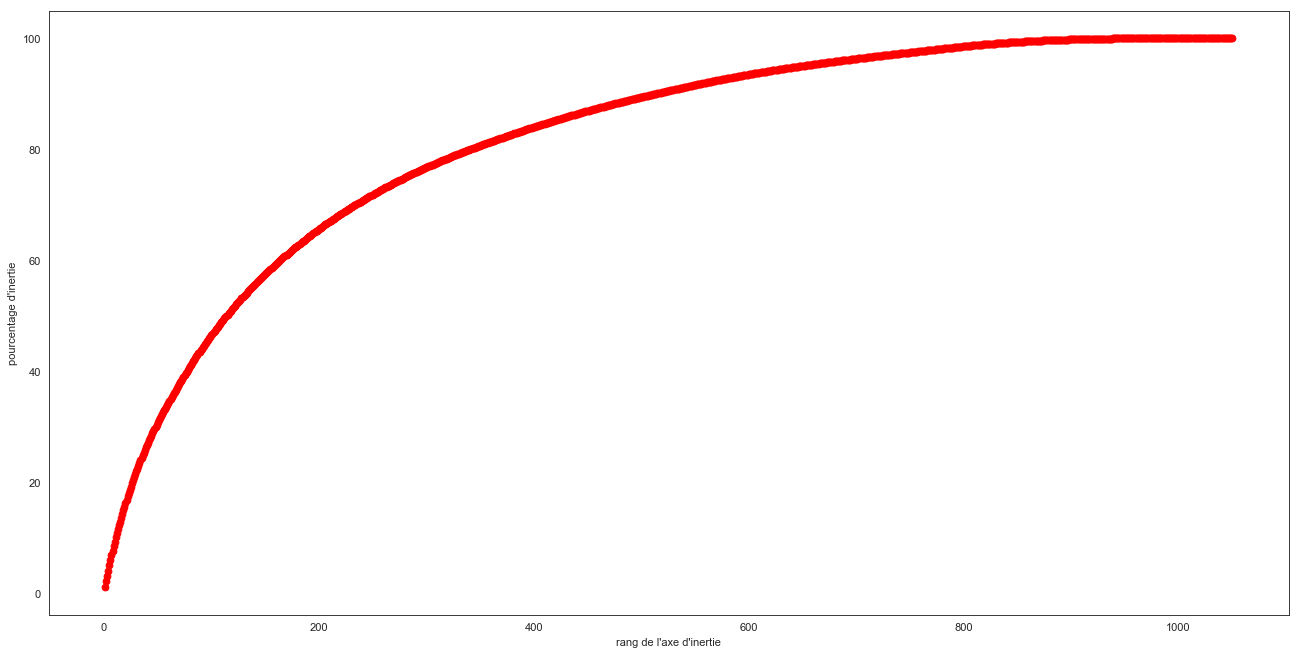

In [112]:
# Représentation des valeurs propres

vp = acp.explained_variance_ratio_*100

fig,ax = plt.subplots(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')

#plt.bar(np.arange(len(vp))+1, vp)
plt.plot(np.arange(len(vp))+1, vp.cumsum(),c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
#plt.xticks(np.arange(len(vp))+1)

#ax.set_xticklabels(np.arange(len(vp))+1,rotation=90)

plt.show()

In [113]:
sum(vp[0:500])

89.37856076938016

In [114]:
vp.shape

(1050,)

On va retenir les 500 premières valeurs propres qui expliquent plus de 80% de la variance totale de nos données.

In [115]:
xScale.shape

(1050, 4570)

In [116]:
projectedValues = acp.transform(xScale)

PCs = ['PC'+str(i+1) for i in range(projectedValues.shape[1])]

projectedValuesDF = pd.DataFrame(projectedValues,columns=PCs)

X_new = projectedValuesDF.iloc[:,:500]
X_new.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,...,PC451,PC452,PC453,PC454,PC455,PC456,PC457,PC458,PC459,PC460,PC461,PC462,PC463,PC464,PC465,PC466,PC467,PC468,PC469,PC470,PC471,PC472,PC473,PC474,PC475,PC476,PC477,PC478,PC479,PC480,PC481,PC482,PC483,PC484,PC485,PC486,PC487,PC488,PC489,PC490,PC491,PC492,PC493,PC494,PC495,PC496,PC497,PC498,PC499,PC500
0,1.781450,1.865034,9.568898,-5.480065,-0.132225,-0.567689,1.643030,-0.451343,-1.022434,6.290584,3.602883,2.805495,-3.858987,3.210029,2.380071,2.118494,8.178357,-8.344561,7.429895,1.757322,7.853676,-1.815371,-1.957439,-1.114476,1.280373,11.724691,-2.575551,30.714488,5.896928,14.315471,-1.311000,-0.983921,-10.368934,-0.301399,12.937321,61.408390,82.006196,88.472689,-26.136513,13.932954,-3.071449,7.333388,0.450679,1.014470,1.232141,-11.767056,2.290666,2.647803,-0.807193,-10.962589,...,-0.087551,0.125768,0.215570,0.028842,-0.024270,-0.017898,-0.017663,0.125895,-0.056141,-0.013989,0.179919,-0.005095,0.033857,-0.155288,0.060080,0.071884,-0.085432,-0.032808,0.056888,-0.034142,-0.053905,-0.028392,-0.015368,-0.052219,-0.088896,0.024083,0.003428,-0.015841,0.079479,-0.061039,0.050563,-0.117572,-0.040002,0.041412,-0.075892,-0.036526,0.005073,-0.074389,0.059227,0.062590,0.048298,-0.044736,0.013293,-0.028848,-0.020207,-0.008642,-0.008097,0.009546,0.004683,-0.011201
1,0.064235,1.649424,-0.492051,0.092453,0.175917,0.010302,-0.053855,-0.025093,-0.283889,-0.776548,0.332597,0.440022,0.067534,0.213909,0.230422,-0.004565,0.369026,0.089903,1.033399,-0.068921,0.292745,0.887742,-0.046244,0.244423,1.503437,3.139807,-0.830378,2.394382,-1.698001,-1.607822,-0.653981,-0.267065,0.104157,-0.437570,0.277346,-0.438933,0.030527,0.055075,0.161410,-2.148198,0.597404,-1.177218,0.708576,-0.074955,-0.247295,-0.019917,-1.397300,0.135556,-0.527771,-0.185679,...,1.613812,-2.231664,-5.226917,-1.571127,0.889863,-2.422218,-3.228186,1.259718,-3.461031,3.253138,-0.108018,-0.337956,1.067797,-0.763052,0.778351,-1.951396,1.262864,-0.311257,1.045614,-0.685377,0.007896,-2.697801,-4.813528,-3.015742,2.926543,-3.288954,-2.235882,1.301661,2.464871,0.902250,0.560858,-0.757824,3.041725,-0.829968,1.793375,-0.687267,1.677587,0.742803,-0.933773,0.581653,-0.547162,-0.557053,-0.527764,0.255102,-0.327961,0.633163,0.486356,0.213803,-0.001576,-0.723526
2,0.249027,-0.014613,0.998876,-0.291501,-0.731191,-0.826155,-0.513061,0.205171,-0.296962,1.004741,2.313685,2.238860,1.884442,-1.987350,0.047234,1.043760,-0.935233,0.889946,2.064252,0.414481,0.978865,1.838735,-0.354111,-0.211727,3.020073,3.310438,3.140700,3.114711,-1.874096,-2.610614,-1.564584,1.810415,0.673303,-0.788992,0.113117,0.601387,1.395419,1.057740,-0.516798,-2.829982,1.370422,-1.976438,0.126454,-0.481988,-0.640270,0.999073,-3.127395,0.906881,-0.099985,-0.141839,...,0.094661,0.048866,-0.197029,-0.078965,0.036864,-0.198169,-0.072144,-0.136415,-0.065172,-0.107327,0.182499,0.037442,-0.069962,0.106795,-0.193166,-0.141282,0.282968,0.204193,0.050096,-0.082648,-0.166402,-0.062055,-0.085660,-0.321147,0.046277,-0.187368,0.044058,0.011961,0.134144,-0.037021,0.055627,-0.017842,0.204200,-0.019121,0.027521,-0.224012,-0.029316,-0.138478,-0.217585,0.126883,-0.275341,-0.016138,-0.096269,-0.008548,0.156189,0.088180,0.240777,-0.116653,-0.019230,-0.041337
3,-0.081765,-0.127075,0.040272,-0.155523,-0.474789,-0.527609,-0.101677,-0.046574,-0.258009,-0.145462,-0.021684,0.450743,-0.022270,0.396627,0.188226,-0.027088,0.883395,0.454045,1.466687,-0.062790,0.462687,1.494916,-0.082127,0.380270,1.904983,4.079675,-0.860909,3.392320,-2.345779,-2.518007,-0.679454,0.257576,1.291688,-0.244073,0.744667,-1.040203,0.543756,0.505058,0.607888,-3.584024,0.395628,-1.882077,0.613138,-0.313942,-0.996529,0.949007,-1.629711,0.311636,-1.007703,0.347042,...,-0.983020,-2.715187,-1.999460,-0.565883,0.116051,1.337457,-5.426147,0.252060,5.245160,-2.01

In [117]:
X_new.shape

(1050, 500)

#### Visualisation TSNE

In [118]:
from sklearn.manifold import TSNE

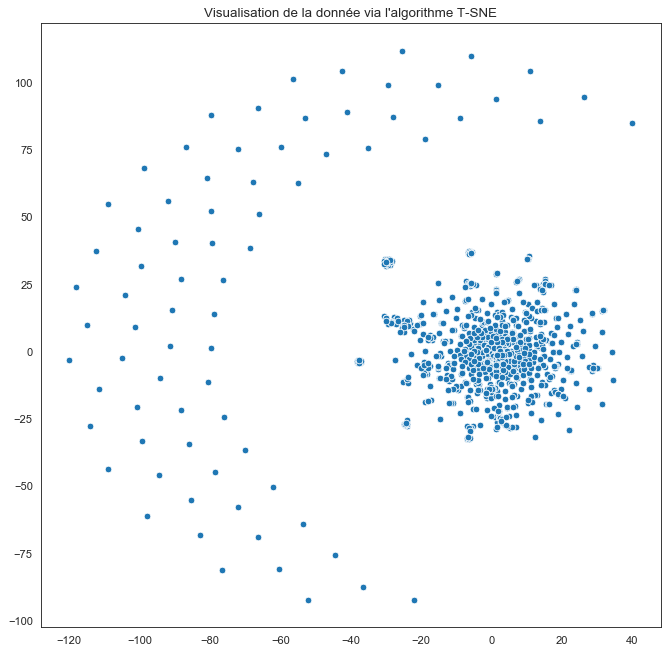

In [119]:
X_embedded = TSNE(n_components=2).fit_transform(X_new)

fig,ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.title("Visualisation de la donnée via l'algorithme T-SNE")
g = sns.scatterplot(X_embedded[:,0], X_embedded[:,1])

#### Entraînement des algorithmes de classification non supervisées 

In [120]:
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN

In [129]:
models = {}
variance = {}
silhouetteScore = {}
daviesBouldin_score = {}

for k in range(2,8):
    km = KMeans(n_clusters=k,random_state=0,n_jobs=-1).fit(X_new)
    
    models[k] = km
    variance[k] = km.inertia_
    silhouetteScore[k] = metrics.silhouette_score(X_new,km.labels_)
    daviesBouldin_score[k] = metrics.davies_bouldin_score(X_new,km.labels_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide

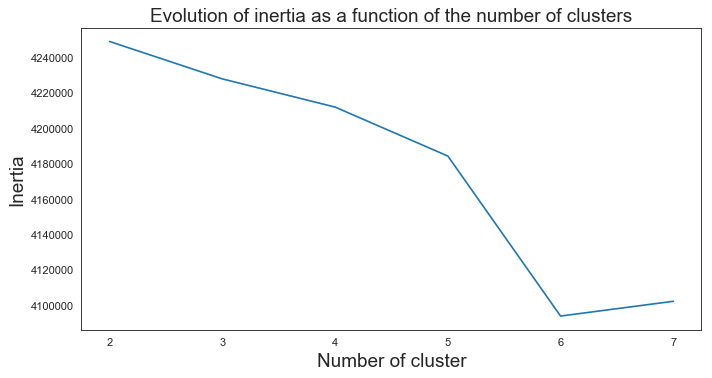

In [130]:
fig,ax = plt.subplots(figsize=(10,5), dpi= 80, facecolor='w', edgecolor='k')


plt.title('Evolution of inertia as a function of the number of clusters',fontsize=17)
plt.plot(list(variance.keys()),list(variance.values()))

#plt.xlim([-50,50])
#plt.ylim([-50,50])
plt.xlabel('Number of cluster',fontsize=17)
plt.ylabel('Inertia',fontsize=17)

plt.show()

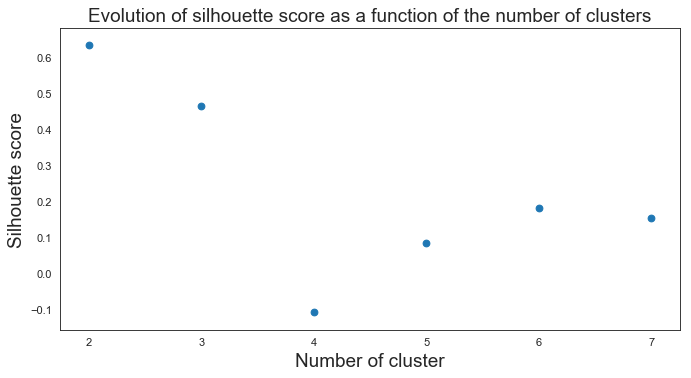

In [131]:
fig,ax = plt.subplots(figsize=(10,5), dpi= 80, facecolor='w', edgecolor='k')


plt.title('Evolution of silhouette score as a function of the number of clusters',fontsize=17)
plt.scatter(list(silhouetteScore.keys()),list(silhouetteScore.values()))

#plt.xlim([-50,50])
#plt.ylim([-50,50])
plt.xlabel('Number of cluster',fontsize=17)
plt.ylabel('Silhouette score',fontsize=17)

plt.show()

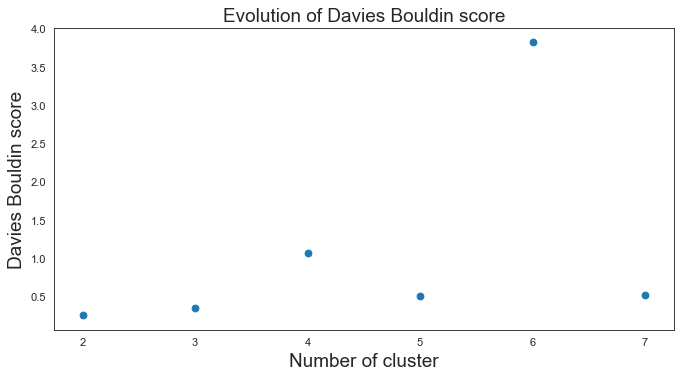

In [132]:
fig,ax = plt.subplots(figsize=(10,5), dpi= 80, facecolor='w', edgecolor='k')


plt.title('Evolution of Davies Bouldin score',fontsize=17)
plt.scatter(list(daviesBouldin_score.keys()),list(daviesBouldin_score.values()))

#plt.xlim([-50,50])
#plt.ylim([-50,50])
plt.xlabel('Number of cluster',fontsize=17)
plt.ylabel('Davies Bouldin score',fontsize=17)

plt.show()

In [134]:
nbClusters = 6

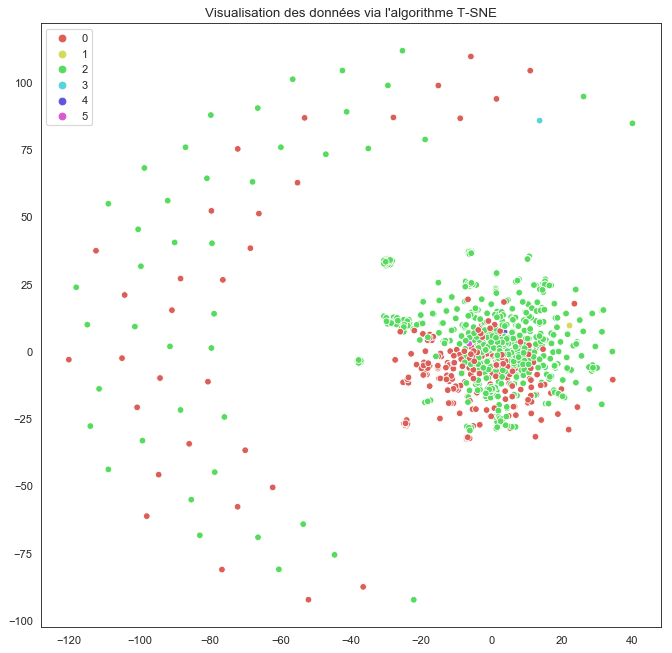

In [135]:
fig,ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.title("Visualisation des données via l'algorithme T-SNE")
g = sns.scatterplot(X_embedded[:,0], X_embedded[:,1],
                    hue=models[nbClusters].labels_,
                    palette=sns.color_palette("hls",n_colors=nbClusters))
plt.show()

In [136]:
cah = AgglomerativeClustering(n_clusters=nbClusters).fit(X_new)

In [137]:
cah.labels_.shape

(1050,)

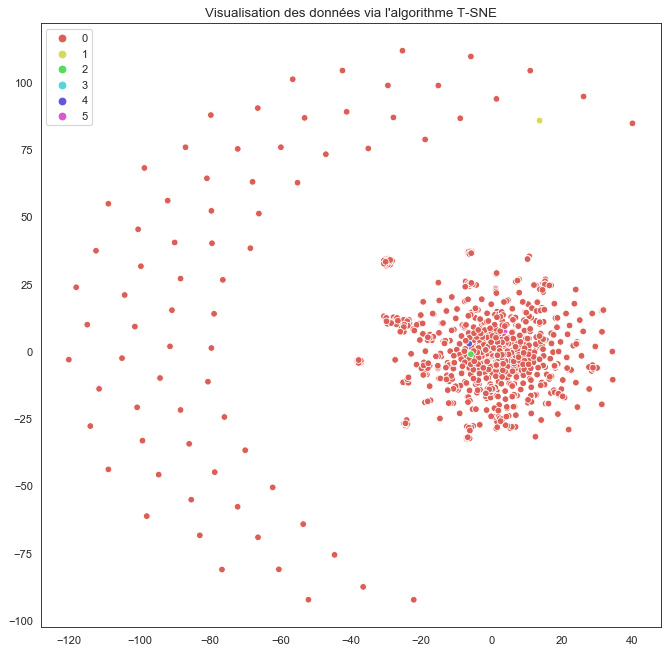

In [138]:
fig,ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.title("Visualisation des données via l'algorithme T-SNE")
g = sns.scatterplot(X_embedded[:,0], X_embedded[:,1],
                    hue=cah.labels_,
                    legend='full',palette=sns.color_palette("hls",nbClusters))

plt.show()

In [140]:
km_silhouette_score = metrics.silhouette_score(X_new,models[nbClusters].labels_)
cah_silhouette_score = metrics.silhouette_score(X_new,cah.labels_)

print('KMeans :',km_silhouette_score)
print('CAH :',cah_silhouette_score)

KMeans : 0.17972498363192396
CAH : 0.6517800069079135


### (Suite) Traitement des données visuelles: Voir notebook P6_02_notebook 